In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.2
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [5]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [6]:
from keras.callbacks import ModelCheckpoint

In [7]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [8]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [9]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[save_best_model])

Epoch 1/100
943/943 [==============================] - 5s 4ms/step - loss: 0.5308 - accuracy: 0.7592 - val_loss: 0.4530 - val_accuracy: 0.7756
Epoch 2/100
943/943 [==============================] - 3s 3ms/step - loss: 0.4044 - accuracy: 0.8032 - val_loss: 0.3819 - val_accuracy: 0.8144
Epoch 3/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3827 - accuracy: 0.8104 - val_loss: 0.3767 - val_accuracy: 0.8086
Epoch 4/100
943/943 [==============================] - 3s 4ms/step - loss: 0.3772 - accuracy: 0.8137 - val_loss: 0.3735 - val_accuracy: 0.8147
Epoch 5/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3771 - accuracy: 0.8094 - val_loss: 0.3769 - val_accuracy: 0.8052
Epoch 6/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3763 - accuracy: 0.8090 - val_loss: 0.3908 - val_accuracy: 0.7975
Epoch 7/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3730 - accuracy: 0.8135 - val_loss: 0.3697 - val_accuracy: 0.8137

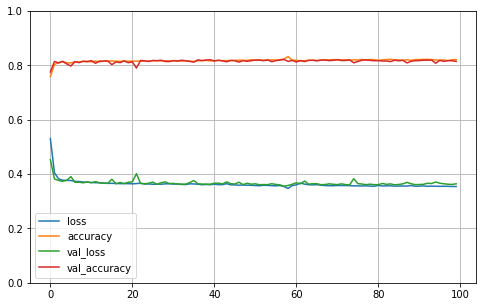

In [10]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 2ms/step - loss: 0.3642 - accuracy: 0.8147


[0.36422252655029297, 0.8146746158599854]

In [13]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test),axis=1) )

0.7543160690571049

# Zad

Wczytaj nauczony model

In [14]:
model.load_weights("wagi_best.h5py")
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 1ms/step - loss: 0.3554 - accuracy: 0.8216


[0.35536232590675354, 0.8216467499732971]

# Zad

* Naucz dowolny model na zbiorze MNIST.
* Zapisz optymalne parametry uczenia do pliku
* Wczytaj dane z pliku

In [15]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model1.summary()
save_best_model = ModelCheckpoint("wagi_best1.h5py",save_best_only=True)
model1.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
save_best_model = ModelCheckpoint("wagi_best1.h5py",save_best_only=True)
history1 = model1.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[save_best_model])

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6197 - accuracy: 0.8405 - val_loss: 0.3103 - val_accuracy: 0.9120
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2953 - accuracy: 0.9151 - val_loss: 0.2473 - val_accuracy: 0.9302
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2429 - accuracy: 0.9304 - val_loss: 0.2060 - val_accuracy: 0.9424
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2074 - accuracy: 0.9406 - val_loss: 0.1823 - val_accuracy: 0.9494
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1810 - accuracy: 0.9487 - val_loss: 0.1644 - val_accuracy: 0.9540
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1603 - accuracy: 0.9544 - val_loss: 0.1482 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1431 - accuracy: 0.9597 - val_loss: 0.1366 - val_accuracy:

In [17]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9799


[0.06925567984580994, 0.9799000024795532]

In [18]:
model1.load_weights("wagi_best1.h5py")
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9790


[0.06879064440727234, 0.9789999723434448]

In [19]:
save_best_model = ModelCheckpoint("wagi_best1.h5py",save_best_only=True)
history1 = model1.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[save_best_model])

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0319 - accuracy: 0.9922 - val_loss: 0.0692 - val_accuracy: 0.9790
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0301 - accuracy: 0.9929 - val_loss: 0.0724 - val_accuracy: 0.9782
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0286 - accuracy: 0.9936 - val_loss: 0.0654 - val_accuracy: 0.9812
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0268 - accuracy: 0.9942 - val_loss: 0.0665 - val_accuracy: 0.9800
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0255 - accuracy: 0.9946 - val_loss: 0.0661 - val_accuracy: 0.9800
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0239 - accuracy: 0.9953 - val_loss: 0.0645 - val_accuracy: 0.9808
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0227 - accuracy: 0.9955 - val_loss: 0.0669 - val_accuracy:

In [20]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9806


[0.06756750494241714, 0.9805999994277954]

In [21]:
model1.load_weights("wagi_best1.h5py")
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0657 - accuracy: 0.9807


[0.06569299846887589, 0.9807000160217285]